In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [10]:
matches=pd.read_csv("C:/Users/HP/Desktop/ipl/IPL_Matches_2008_2022.csv")
balls=pd.read_csv("C:/Users/HP/Desktop/ipl/IPL_Ball_by_Ball_2008_2022.csv")
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [11]:
print(matches.shape)

(950, 20)


In [12]:
print(matches.isnull().sum())

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64


In [13]:
print(matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [14]:
matches[matches['WinningTeam'].isna()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


These matches has no Result because matches were stopped due to rain or other reasons

In [15]:
#Dropping unnecessary columns from the match dataset
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches=matches.dropna()

In [16]:
matches.head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [17]:
matches[matches['Season']=='2020/21'].head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
135,2020-11-08,2020/21,Qualifier 2,Delhi Capitals,Sunrisers Hyderabad,Sheikh Zayed Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,17.0,MP Stoinis,"['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...","['PK Garg', 'DA Warner', 'MK Pandey', 'KS Will...",PR Reiffel,S Ravi
136,2020-11-06,2020/21,Eliminator,Royal Challengers Bangalore,Sunrisers Hyderabad,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,6.0,KS Williamson,"['V Kohli', 'D Padikkal', 'AJ Finch', 'AB de V...","['DA Warner', 'SP Goswami', 'MK Pandey', 'KS W...",PR Reiffel,S Ravi
137,2020-11-05,2020/21,Qualifier 1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,57.0,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['PP Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'...",CB Gaffaney,Nitin Menon
138,2020-11-03,2020/21,56,Mumbai Indians,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,10.0,S Nadeem,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",C Shamshuddin,RK Illingworth


In [18]:
#Converting the data columns into their respective data types
matches['Date']=pd.to_datetime(matches['Date'])

In [14]:
matches['SEASON_INT']=matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT']=matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

In [15]:
matches.drop('Season',axis=1,inplace=True)

In [19]:
matches.head(2)

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [20]:
matches['WinningTeam'].unique() 

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [21]:
matches['Team1']=matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2']=matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam']=matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

In [22]:
matches['Team1']=matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2']=matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam']=matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [23]:
matches['Team1']=matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2']=matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam']=matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [24]:
matches['Team1']=matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2']=matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam']=matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

In [25]:
matches['Team1']=matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2']=matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam']=matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [26]:
matches.head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [27]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [28]:
print(balls.shape)

(225954, 17)


In [29]:
print(balls.isnull().sum())

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64


In [30]:
print(balls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [31]:
#Batsman Statistics
batgroup=balls.groupby(['batter'])
batsman_Stats=pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats.head()

,Balls_Faced
batter,
A Ashish Reddy,196
A Badoni,139
A Chandila,7
A Chopra,75
A Choudhary,20


In [32]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats.head()

,Balls_Faced,innings
batter,,
A Ashish Reddy,196,2
A Badoni,139,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2


In [33]:
batsman_Stats['runs']=batgroup['batsman_run'].sum()
batsman_Stats.head()

,Balls_Faced,innings,runs
batter,,,
A Ashish Reddy,196,2,280
A Badoni,139,2,161
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25


In [34]:
batsman_Stats['0s']=balls[balls['batsman_run']==0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s
batter,,,,
A Ashish Reddy,196,2,280,61.0
A Badoni,139,2,161,57.0
A Chandila,7,1,4,3.0
A Chopra,75,2,53,45.0
A Choudhary,20,2,25,4.0


In [35]:
batsman_Stats['1s']=balls[balls['batsman_run']==1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s']=balls[balls['batsman_run']==2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s']=balls[balls['batsman_run']==3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s']=balls[balls['batsman_run']==4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['5s']=balls[balls['batsman_run']==5].groupby('batter')['batsman_run'].count()
batsman_Stats['5s'].fillna(0,inplace=True)

batsman_Stats['6s']=balls[balls['batsman_run']==6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,5s,6s
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,0.0,15.0
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,0.0,7.0
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,0.0
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,0.0
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,0.0,1.0


In [36]:
batsman_Stats['player_out']=batgroup['player_out'].count()
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,5s,6s,player_out
batter,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,0.0,15.0,15
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,0.0,7.0,9
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,0.0,1
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,0.0,5
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,0.0,1.0,2


In [37]:
batsman_Stats['bat_average']=round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike']=round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,5s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,0.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,0.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,0.0,1.0,2,12.50,125.00


In [38]:
#Bowler Statistics
bowlgroup=balls.groupby(['bowler'])

In [39]:
bowler_Stats=pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})

In [40]:
balls['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [41]:
#Get only useful wickets and outs
wickets_out=balls[balls['kind'].isin(['caught','bowled','lbw','stumped','caught and bowled','hit wicket'])]
bowler_Stats['wickets']=wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats.head()

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Badoni,12,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,NaN


In [42]:
bowler_Stats['wickets'].fillna(0,inplace=True)

In [43]:
#Calculating total number of overs bowled
bowler_Stats['overs']=round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

,BallsThrow,wickets,overs
bowler,,,
A Ashish Reddy,270,18.0,45.0
A Badoni,12,2.0,2.0
A Chandila,234,11.0,39.0
A Choudhary,108,5.0,18.0
A Dananjaya,25,0.0,4.0


In [44]:
bowler_Stats['runs_conceded']=balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded']=bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,386
A Badoni,12,2.0,2.0,11
A Chandila,234,11.0,39.0,242
A Choudhary,108,5.0,18.0,137
A Dananjaya,25,0.0,4.0,46


In [66]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

In [67]:
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,436.0,8.80,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,172.0,8.00,21.60
A Dananjaya,25,0.0,4.0,51.0,11.75,inf


In [68]:
bowler_Stats['bowl_econ']=round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,436.0,9.69,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,172.0,9.56,21.60
A Dananjaya,25,0.0,4.0,51.0,12.75,inf


In [69]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')
     

In [71]:
final_players_matches.head()

,matches
Players,
YBK Jaiswal,23
JC Buttler,81
Mohammed Shami,93
Yash Dayal,9
SV Samson,134


In [74]:
# Catches Caught by Players
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)
    

In [75]:
catchDf.head()

,catches
A Ashish Reddy,9.0
A Badoni,9.0
A Chandila,7.0
A Chopra,2.0
A Flintoff,4.0


In [113]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches, batsman_Stats, left_index=True, right_index=True, how='outer')

# Merging Bowler Stats
final_df = pd.merge(final_df, bowler_Stats, left_index=True, right_index=True, how='outer')

# Merging Catches Stats of Each Player
final_df = pd.merge(final_df, catchDf, left_index=True, right_index=True, how='outer')

# Merging the data of players who got Man of the Match or not
matches['Player_of_Match'] = matches['Player_of_Match'].astype(str)
player_counts = matches['Player_of_Match'].value_counts().reset_index()
player_counts.columns = ['Player', 'Player_of_Match_Count']  # Rename the column for clarity

# Merge player counts into final_df based on the player name
final_df = pd.merge(final_df, player_counts, left_index=True, right_on='Player', how='left')
final_df.set_index('Player', inplace=True)  # Set the player names as index
final_df.fillna(0, inplace=True)

final_df.head()


,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,5s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match_Count
Player,,,,,,,,,,,,,,,,,,,,,,
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,0.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,436.0,9.69,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,0.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,0.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,172.0,9.56,21.60,0.0,0.0


In [102]:
final_df.columns

Index(['matches', 'Balls_Faced', 'innings', 'runs', '0s', '1s', '2s', '3s',
       '4s', '5s', '6s', 'player_out', 'bat_average', 'bat_strike',
       'BallsThrow', 'wickets', 'overs', 'runs_conceded', 'bowl_econ',
       'bowl_strike_rate', 'catches', 'Player_of_Match_Count'],
      dtype='object')

In [114]:
import plotly.express as px

In [115]:
# create a bar plot to see the Number of runs scored by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match_Count', y='runs', title='Number of runs scored by different players and they get Player of Match',hover_name=final_df.index,color='runs')
# show the plot
fig.show()

In [116]:
# create a bar plot to see the Number of Wickets taken by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match_Count', y='wickets', title='Number of Wickets taken by different players and they get Player of Match',hover_name=final_df.index,color='wickets')
# show the plot
fig.show()

In [117]:
# Create the scatter plot to see the Most Player of the Match by a Player
fig = px.scatter(final_df, x='matches', y='Player_of_Match_Count',color='Player_of_Match_Count',
                 size='Player_of_Match_Count', hover_name=final_df.index, title='Player of the Match')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [120]:
# Create the scatter plot to see Which player has best strike rate 
fig = px.scatter(final_df, x='matches', y='bat_strike',color='bat_strike',
                 size='bat_strike', hover_name=final_df.index, title='Batsman Strike Rate')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [121]:
# Create the scatter plot to see the Which Player got most Catches
fig = px.scatter(final_df, x='matches', y='catches',color='catches',
                 size='catches', hover_name=final_df.index, title='Most Catches by Players')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [122]:
# Create the scatter plot to see the Bowling Economy by players
fig = px.scatter(final_df, x='matches', y='bowl_econ',color='bowl_econ',
                 size='matches', hover_name=final_df.index, title='Bowling Economy')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [119]:
# Create the scatter plot to see the Most 6s by a Batsman
fig = px.scatter(final_df, x='matches', y='6s',color='6s',
                 size='6s', hover_name=final_df.index, title='Most 6s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='greens'))

# Show the plot
fig.show()

In [118]:
# Create the scatter plot to see the Most 4s by a Batsman
fig = px.scatter(final_df, x='matches', y='4s',color='4s',
                 size='4s', hover_name=final_df.index, title='Most 4s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [123]:
# Create the scatter plot to see the Most 0s on the balls they Faced by a Batsman
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [124]:
# Calculate the ratio of matches to player_out
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name=final_df.index, 
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [125]:
#Finding top 10 batsman,bowlers,strike rate,best team
final_df = final_df[final_df['matches']>50]
final_df.head()

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,5s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match_Count,not_out
Player,,,,,,,,,,,,,,,,,,,,,,,
A Mishra,154.0,410.0,2.0,362.0,182.0,172.0,22.0,0.0,29.0,0.0,5.0,30.0,12.07,88.29,3317.0,166.0,553.0,4292.0,7.76,19.98,21.0,12.0,124.0
A Nehra,88.0,63.0,2.0,41.0,37.0,21.0,1.0,0.0,3.0,0.0,1.0,8.0,5.12,65.08,1974.0,106.0,329.0,2787.0,8.47,18.62,19.0,6.0,80.0
AB Dinda,76.0,50.0,2.0,26.0,31.0,16.0,1.0,0.0,2.0,0.0,0.0,9.0,2.89,52.00,1589.0,69.0,265.0,2417.0,9.12,23.03,7.0,2.0,67.0
AB de Villiers,170.0,3487.0,4.0,5181.0,1115.0,1420.0,268.0,17.0,414.0,0.0,253.0,125.0,41.45,148.58,0.0,0.0,0.0,0.0,0.00,0.00,120.0,24.0,45.0
AC Gilchrist,80.0,1555.0,2.0,2069.0,737.0,417.0,66.0,4.0,239.0,0.0,92.0,76.0,27.22,133.05,1.0,1.0,0.0,0.0,0.00,1.00,51.0,7.0,4.0


In [126]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")
fig.show()

In [127]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

In [128]:
matches.head(2)

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [129]:
# Create a new column for the winning team
matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches["WinningTeam"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [130]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [132]:
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)

# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

In [133]:
# Plot the most winning team for each year
fig = px.bar(winning_teams, x='WinningTeam', y='SEASON_END_INT', hover_name='WinningTeam',color='SEASON_END_INT')
fig.show()

Best Players of time using K-means clustering

<Axes: >

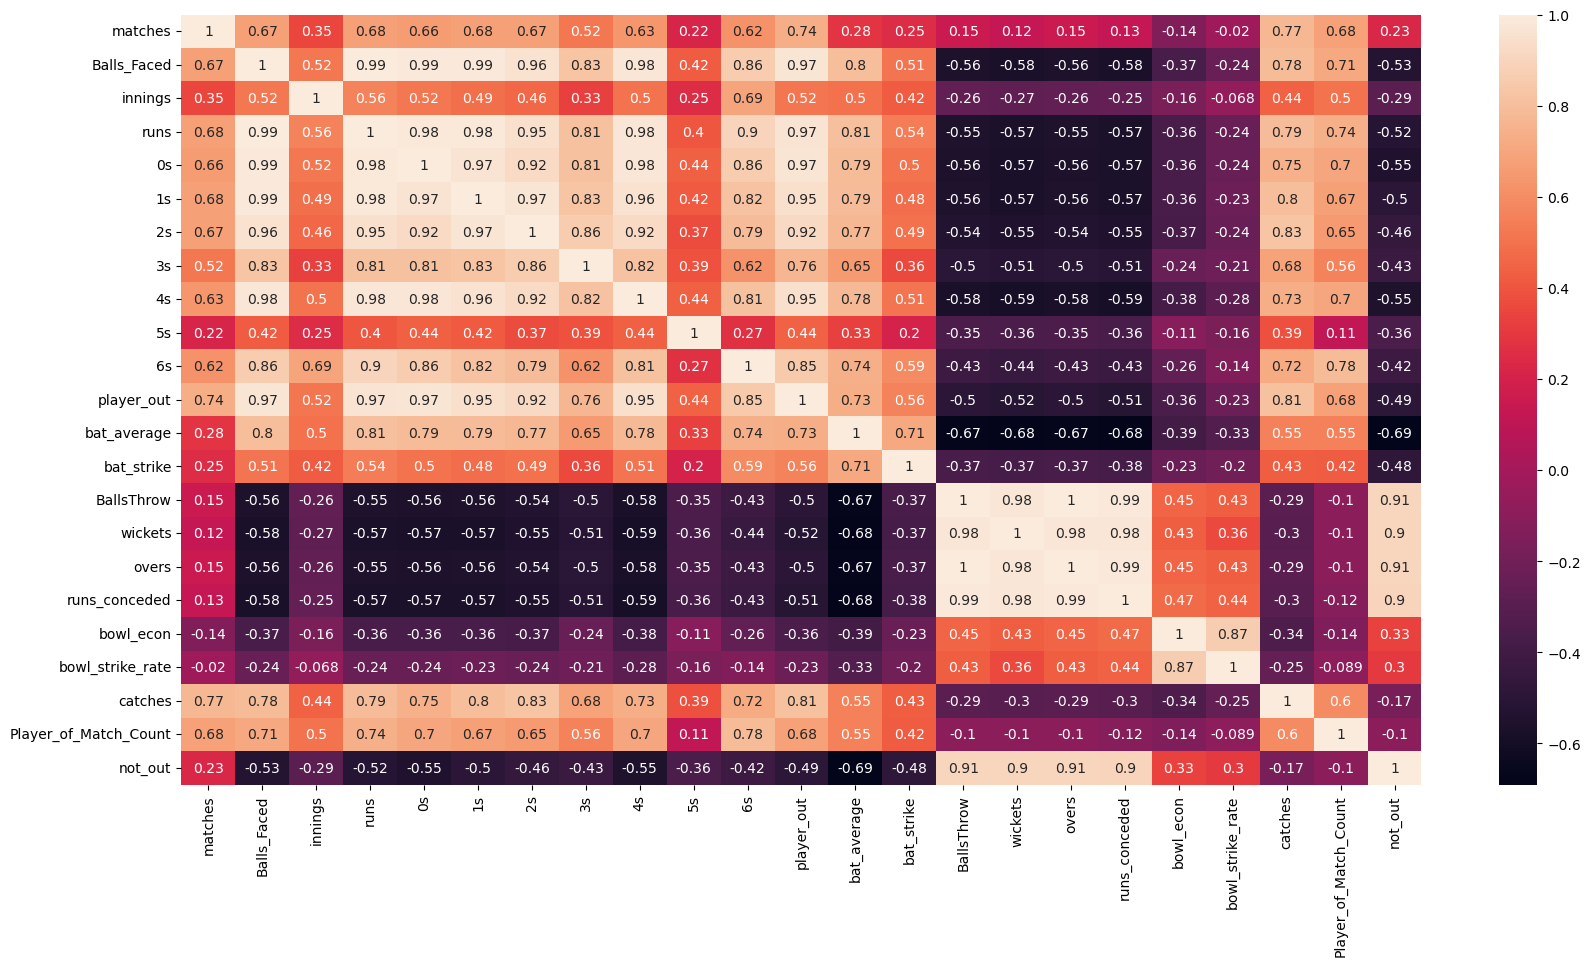

In [134]:
# Let's Remove the Most Correlated Columns
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)

In [140]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [141]:

corr_cols = correlation(final_df,0.85)
corr_cols

['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out']

In [142]:
top_columns =final_df.drop(['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out'],axis=1)

In [143]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]
final_df_new.head()

,matches,Balls_Faced,innings,5s,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match_Count
Player,,,,,,,,,,
A Mishra,154.0,410.0,2.0,0.0,12.07,88.29,3317.0,7.76,21.0,12.0
A Nehra,88.0,63.0,2.0,0.0,5.12,65.08,1974.0,8.47,19.0,6.0
AB Dinda,76.0,50.0,2.0,0.0,2.89,52.00,1589.0,9.12,7.0,2.0
AB de Villiers,170.0,3487.0,4.0,0.0,41.45,148.58,0.0,0.00,120.0,24.0
AC Gilchrist,80.0,1555.0,2.0,0.0,27.22,133.05,1.0,0.00,51.0,7.0


In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [149]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(final_df_new),
    columns=top_columns.columns,
    index=final_df_new.index
)
scaled_data.head()

,matches,Balls_Faced,innings,5s,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match_Count
Player,,,,,,,,,,
A Mishra,1.284238,-0.698228,-0.509563,-0.514073,-0.865744,-1.059655,2.127278,0.258677,-0.588725,1.429841
A Nehra,-0.292123,-0.986563,-0.509563,-0.514073,-1.530885,-2.001902,0.859354,0.434779,-0.663943,0.128469
AB Dinda,-0.578734,-0.997365,-0.509563,-0.514073,-1.744305,-2.532906,0.495876,0.595999,-1.115251,-0.739113
AB de Villiers,1.666387,1.858559,2.571516,-0.514073,1.946034,1.387913,-1.004295,-1.666042,3.134565,4.032587
AC Gilchrist,-0.483197,0.253192,-0.509563,-0.514073,0.584169,0.757448,-1.003351,-1.666042,0.539544,0.345364


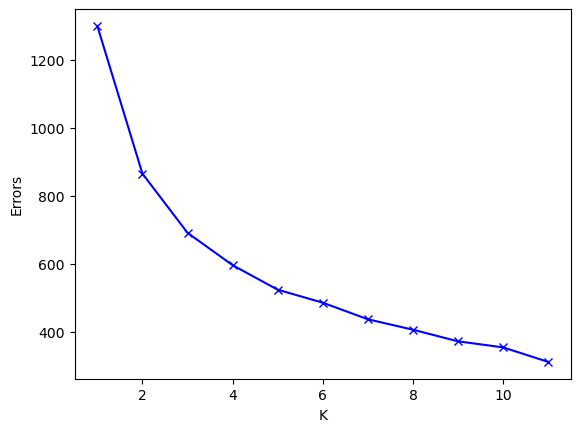

In [147]:
clusters=range(1,12)
errors=[]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)
plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters,errors,'bx-')

In [150]:
odel = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred

In [154]:
final_df_new.head()

,Player,matches,Balls_Faced,innings,5s,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match_Count,cluster
0,A Mishra,154.0,410.0,2.0,0.0,12.07,88.29,3317.0,7.76,21.0,12.0,0
1,A Nehra,88.0,63.0,2.0,0.0,5.12,65.08,1974.0,8.47,19.0,6.0,5
2,AB Dinda,76.0,50.0,2.0,0.0,2.89,52.00,1589.0,9.12,7.0,2.0,5
3,AB de Villiers,170.0,3487.0,4.0,0.0,41.45,148.58,0.0,0.00,120.0,24.0,4
4,AC Gilchrist,80.0,1555.0,2.0,0.0,27.22,133.05,1.0,0.00,51.0,7.0,6


In [155]:
final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index':'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames','cluster']])

In [156]:
topPlayers_cluster

,PlayerNames,cluster
0,0,0
1,1,5
2,2,5
3,3,4
4,4,6
...,...,...
125,125,7
126,126,9
127,127,0
128,128,7


In [157]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [158]:
TopPlayer_Dataset = pd.DataFrame(teams1,columns=['teams1'])

In [159]:
TopPlayer_Dataset['teams2']=pd.Series(teams2)
TopPlayer_Dataset['teams3']=pd.Series(teams3)
TopPlayer_Dataset['teams4']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')

In [91]:
TopPlayer_Dataset

,teams1,teams2,teams3,teams4
0,A Mishra,AD Russell,AC Gilchrist,AB de Villiers
1,A Nehra,AJ Finch,AT Rayudu,AM Rahane
2,AB Dinda,AM Nayar,BB McCullum,CH Gayle
3,AR Patel,BJ Hodge,DA Miller,HH Pandya
4,B Kumar,CH Morris,DPMD Jayawardene,KA Pollard
5,DJ Bravo,DJ Hooda,EJG Morgan,KD Karthik
6,DL Chahar,DJ Hussey,G Gambhir,MK Pandey
7,DS Kulkarni,DR Smith,Ishan Kishan,MS Dhoni
8,DW Steyn,F du Plessis,JC Buttler,RA Jadeja
9,HV Patel,GJ Maxwell,KC Sangakkara,RG Sharma


# Winning Prediction model

In [160]:
matches=pd.read_csv("C:/Users/HP/Desktop/ipl/IPL_Matches_2008_2022.csv")
balls=pd.read_csv("C:/Users/HP/Desktop/ipl/IPL_Ball_by_Ball_2008_2022.csv")

In [162]:
inningScores = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()
inningScores = inningScores[inningScores['innings']==1]
inningScores.head(10)

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
10,335987,1,166
12,335988,1,142
14,335989,1,208
16,335990,1,214
18,335991,1,182


In [163]:
inningScores['target'] = inningScores['total_run'] + 1
inningScores.head(10)

,ID,innings,total_run,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111
10,335987,1,166,167
12,335988,1,142,143
14,335989,1,208,209
16,335990,1,214,215
18,335991,1,182,183


In [164]:
matches = matches.merge(inningScores[['ID','target']], on='ID')

In [165]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')


matches['Team1'] = matches['Team1'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Pune Warriorss', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [166]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [167]:
matches = matches[matches['Team1'].isin(teams2023)]
matches = matches[matches['Team2'].isin(teams2023)]
matches = matches[matches['WinningTeam'].isin(teams2023)]

In [168]:
matches['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [169]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [170]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin              14
method             843
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
target               0
dtype: int64

In [171]:
matches = matches[['ID','City','Team1','Team2','WinningTeam','target']].dropna()
matches.head()

,ID,City,Team1,Team2,WinningTeam,target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,158
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,208
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,189
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,158


In [172]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Pune Warriorss', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [173]:
balls = balls[balls['BattingTeam'].isin(teams2023)]
balls.head()
     

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [174]:

final = matches.merge(balls, on='ID')
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [175]:
final = final[final['innings']==2]
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [176]:
final['current_score'] = final.groupby('ID')['total_run'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1


In [177]:

final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130


In [178]:

final['balls_left'] = np.where(120 - final['overs']*6 - final['ballnumber']>=0,120 - final['overs']*6 - final['ballnumber'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115


In [179]:
final['wickets_left'] = 10 - final.groupby('ID')['isWicketDelivery'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10


In [180]:
final['current_run_rate'] = (final['current_score']*6)/(120-final['balls_left'])
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)

In [181]:

def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [182]:
final['result'] = final.apply(result, axis=1)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1


In [183]:
index1 = final[final['Team2'] == final['BattingTeam']]['Team1'].index
index2 = final[final['Team1'] == final['BattingTeam']]['Team2'].index
final.loc[index1, 'BowlingTeam'] = final.loc[index1, 'Team1']
final.loc[index2, 'BowlingTeam'] = final.loc[index2, 'Team2']
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1,Rajasthan Royals


In [184]:
winningPred = final[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
winningPred.head()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,0.0,6.605042,131,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,0.0,6.661017,131,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,2.0,6.666667,131,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,1.5,6.724138,131,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,1.2,6.782609,131,1


In [185]:
winningPred.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
161866,Delhi Capitals,Sunrisers Hyderabad,Cuttack,72,42,7,7.692308,10.285714,172,0


In [186]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
],
remainder = 'passthrough')

In [187]:
from sklearn.model_selection import train_test_split

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((92862, 9), (92862,))

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [190]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [191]:
pipe.predict_proba(X_test)

array([[0.01, 0.99],
       [0.02, 0.98],
       [0.  , 1.  ],
       ...,
       [0.02, 0.98],
       [0.79, 0.21],
       [0.08, 0.92]])

In [192]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2023 = pd.DataFrame(l,columns=columns)

In [195]:
pipe.predict_proba(team2023)

array([[0.48, 0.52]])

In [200]:
l = [[ 'Mumbai Indians', 'Gujarat Titans', 'Ahmedabad', 100, 85, 4 ,7.4, 10.5, 220]]
columns = ['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2023 = pd.DataFrame(l,columns=columns)

In [201]:
pipe.predict_proba(team2023)

array([[0.74, 0.26]])